<a href="https://colab.research.google.com/github/Shayankr/Machine_Learning/blob/master/Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<center>SciPy  -- stands for -- Scientific Python</center>**

SciPy is a free open source python library for scientific computing and technical computing.

It is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python.

It adds significant power to the intercative Python session by providing the user with high-level commands -- and -- claases -- for manipulating and visualizing data.

**Scipy builds on Numpy and therefore if we import Scipy, there is no need to import Numpy.**

**AS, Seaborn is built on top of matplotlib.**

Scipy is supported across multiple Operating Systems.

* Windows
* Linux distributions
* MacOS

**pip -- preferred installer program**

In [1]:
# Install Scipy

#!pip install scipy

C:\Users\Shayan Kumar>pip show scipy

Name: scipy

Version: 1.9.1

Summary: SciPy: Scientific Library for Python

Home-page: https://www.scipy.org

Author:
Author-email:
License: BSD

Location: c:\users\shayan kumar\appdata\local\programs\python\python310\lib\site-packages

Requires: numpy

Required-by: scikit-learn

In [2]:
# conda install -c anaconda scipy

**Sub Packages in Scipy:**
* scipy.cluster
* scipy.constants
* scipy.fftpack
* scipy.integrate
* scipy.interpolation
* scipy.linalg
* scipy.io
* scipy.ndimage

* scipy.odr   -- orthogonal distance regression
* scipy.optimize  -- use for optimization
* scipy.signal -- It is used in signal processing
* scipy.sparse -- Sparse matrices and associated routines
* scipy.spatial  -- Spatial data structures and lagorithms
* scipy.special -- specila functions
* scipy.stats -- statistics
* scipy.weaves -- It is a tool for writing

**SciPy Cluster**

Clustering is the task of dividing the population or data points into a number of groups such as that the d]data points in the same groups are more similar to other data points in the same group and disimilar to the data points in the other groups.

Each gropu which is formed from clustering is known as a **Cluster**

**There are 2 types of Clusters:**
1. **Cenral**
2. **Hierarchy**

In [3]:
# Example:

# Use NumPy to generate two sets of random points
# After joining both these sets, Whiten the data
# Whitening normalizes the data and is an essential step before using k-means clustering
# Finally, use the k-means and pass it the data and number of clustered we want.

**What is Whitening or Sphering? Why?**

“A whitening transformation or sphering transformation is a linear transformation that transforms a vector of random variables with a known covariance matrix into a set of new variables whose covariance is the identity matrix, meaning that they are uncorrelated and each have variance.The transformation is called “whitening” because it changes the input vector into a white noise vector.”

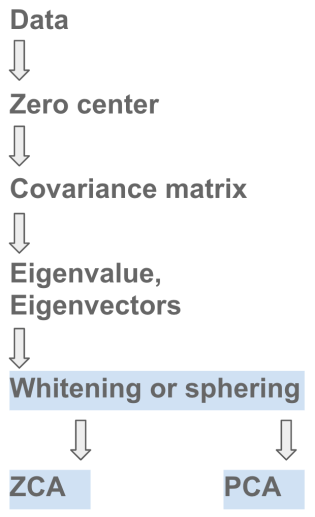

## **SciPy Cluster**

In [4]:
import numpy as np
from scipy.cluster.vq import kmeans, whiten
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [5]:
# Create 50 datapoints in two clusters a and b

pts =100
a = np.random.multivariate_normal([0,0], [[4,1],[1,4]], size=pts)
b = np.random.multivariate_normal([30,10],[[10,2],[2,1]], size=pts)

In [6]:
a.shape

(100, 2)

In [7]:
print(a.T)

[[ 0.32621706 -0.117939    1.08323649 -0.32531344  2.19525596 -3.23154228
   0.99335243 -0.79642704  1.33632919  0.31324133 -0.69542697 -4.24119619
  -0.31791508  1.37863492  3.17848778  0.26007909 -0.63727327 -0.10513161
  -2.99232915  0.75002916 -2.71811125 -2.77845144  1.49946795 -1.00667381
  -0.90401895  3.36754485 -1.28271968 -1.34613742  1.6265224  -2.2480309
   1.24286698  3.15924483  1.76349689  0.91207204  0.80589638  2.5219641
   0.95757371  3.03852083  1.36467173 -1.30188967 -0.5463997   0.98840932
   3.27605701  1.45059801  0.37344621 -1.75100924  1.10244102 -2.49648471
  -4.37701597 -4.00925729  0.32512998 -3.25711723  1.67944531  1.09009521
  -3.47488372  3.65631704 -0.26923804  0.31677134  0.19853521  0.20204085
   2.63879925  2.09945672 -0.8611997  -0.43007475 -2.34405378 -3.36506123
   2.91328731  0.06657166 -1.55994442 -0.88549866  0.06477155  2.86191327
  -3.2636021  -2.92292326 -0.92740744 -1.41922833  1.32508569 -0.57685591
   2.94260707 -5.24510363  0.17818581  1

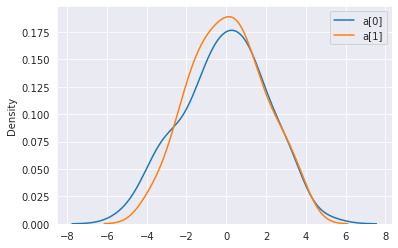

In [8]:
sns.kdeplot(a.T[0], label="a[0]")
sns.kdeplot(a.T[1], label="a[1]")
plt.legend()
plt.show()

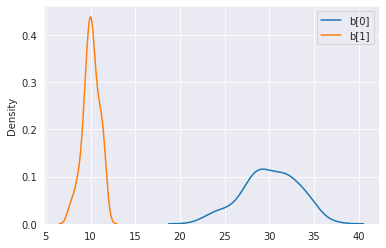

In [9]:
sns.kdeplot(b.T[0], label="b[0]")
sns.kdeplot(b.T[1], label="b[1]")
plt.legend()
plt.show()

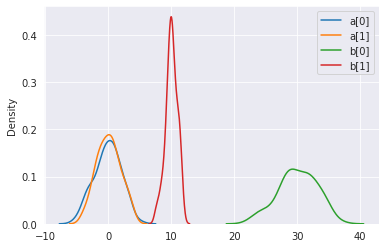

In [10]:
sns.kdeplot(a.T[0], label="a[0]")
sns.kdeplot(a.T[1], label="a[1]")
sns.kdeplot(b.T[0], label="b[0]")
sns.kdeplot(b.T[1], label="b[1]")
plt.legend()
plt.show()

In [11]:
features = np.concatenate((a,b))

In [12]:
features.shape

(200, 2)

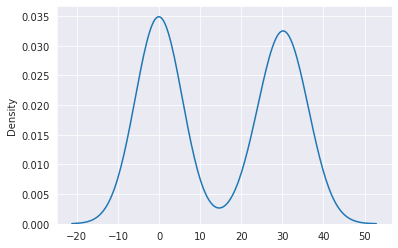

In [13]:
sns.kdeplot(features.T[0])

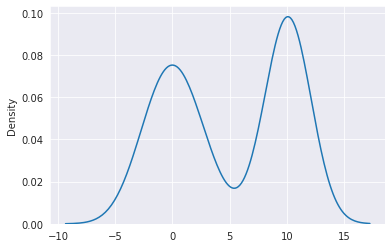

In [14]:
sns.kdeplot(features.T[1])

In [15]:
# Whiten data

whitened = whiten(features)

In [16]:
type(whitened)

numpy.ndarray

In [17]:
whitened.shape

(200, 2)

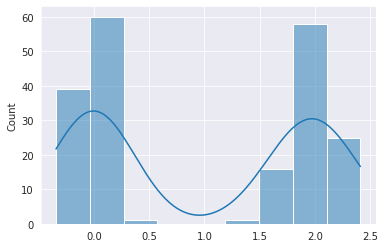

In [18]:
sns.histplot(whitened.T[0],kde=True,)

In [19]:
whitened.shape[0]

200

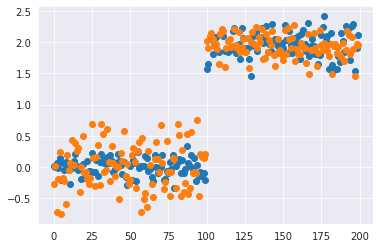

In [20]:
plt.scatter(np.arange(whitened.shape[0]),whitened.T[0], cmap='viridis')
plt.scatter(np.arange(whitened.shape[0]),whitened[:,1], cmap='viridis')

In [21]:
# Find 2 clusters in the data

codebook, distortion = kmeans(whitened, 2)

In [22]:
codebook

array([[ 1.96550577,  1.92992971],
       [-0.00521746,  0.01003987]])

In [23]:
distortion

0.28213609538552964

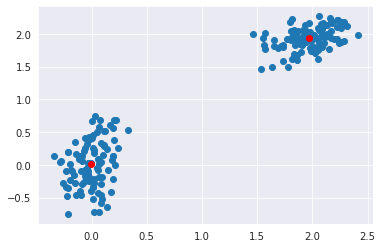

In [24]:
# PLot whitened adta and clustered centeres in red

plt.scatter(whitened[:,0], whitened[:,1])
plt.scatter(codebook[:,0], codebook[:,1], c="r")
plt.show()

## **SciPy Constants**

In [25]:
from scipy.constants import find
find('boltzmann')

['Boltzmann constant',
 'Boltzmann constant in Hz/K',
 'Boltzmann constant in eV/K',
 'Boltzmann constant in inverse meter per kelvin',
 'Stefan-Boltzmann constant']

In [26]:
import scipy

In [27]:
scipy.constants.physical_constants['Boltzmann constant in Hz/K']

(20836619120.0, 'Hz K^-1', 0.0)

## **SciPy FFTpack**

FFT -- Fast Fourier Transform

It is an algorithm for computing DFT.

DFT is a mathematical technique which is used in converting spatila data into frequency data.

SciPy provides the fftpack module, which is used to claculate Fourier Ttransformation.

**scipy.fft**

In [28]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

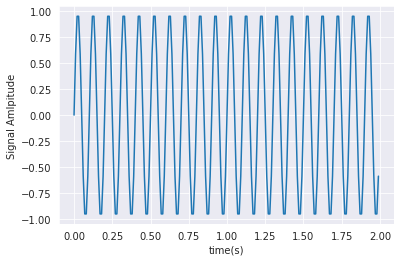

In [29]:
# frequency in terms of Hertz
freq = 10

# Sample rate
freq_samp=100

t = np.linspace(0,2,2*freq_samp, endpoint=False)

a = np.sin(freq*2*np.pi*t)

plt.plot(t,a)
plt.xlabel("time(s)")
plt.ylabel("Signal Amlpitude")
plt.show()

**Observing transformation**

In [30]:
from scipy import fftpack

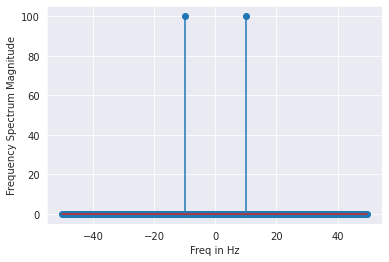

In [31]:
A = fftpack.fft(a)
frequency = fftpack.fftfreq(len(a))*freq_samp
plt.stem(frequency, np.abs(A), use_line_collection=True)

plt.xlabel("Freq in Hz")
plt.ylabel("Frequency Spectrum Magnitude")
plt.show()

## **SciPy InterPolation**

is the process of estimating unknown values that fall between known values.

**scipy.interpolation**

**With this package, we can perform 1-D or univariate interpolation and Multivariate interpolation.**

In [32]:
from scipy import interpolate

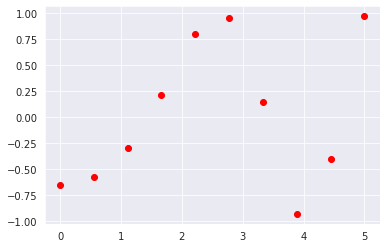

In [33]:
x = np.linspace(0,5,10)
y = np.cos(x**2/3+4)

plt.scatter(x,y, c='r')
plt.show()

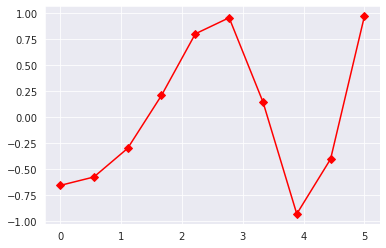

In [34]:
plt.plot(x,y,'r-D')

* scipy interpolation provides interp1d class which is a useful method to create a function based on fixed data points.

* Here below, 2(two) such functions are created using different techniques of interpolation.

In [35]:
from scipy.interpolate import interp1d


In [36]:
func1 = interp1d(x,y, kind='linear')
func2 = interp1d(x,y, kind='cubic')

In [37]:
# Define a new set of input
xnew = np.linspace(0,4,30)

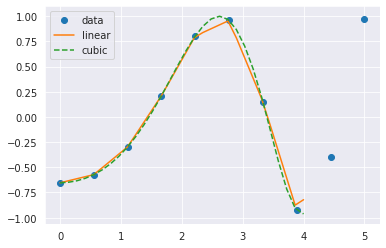

In [38]:
plt.plot(x,y, "o", xnew, func1(xnew), "-", xnew,func2(xnew),"--")
plt.legend(["data","linear","cubic",])

plt.show()

## **SciPy linalg**

SciPy has very fast linear algebra capabilities

* It is built using the optimized **ATLAS** (*Automatically Tuned Linear Algebra Software*), **LAPACK** (*Linear Algebra Package*) and **BLAS** (*Basic Linear Algebra Subprograms*) libraries.

* All of these linear algebra routines can operate on an object that can be converted into a teo-dimensional array and also returns the iutput as a two-dimensional array.

In [39]:
from scipy import linalg

In [40]:
# we are trying to solve a linear algebra system of equations which can be given as:

#     x + 2y - 3z = -3
#    2x - 5y + 4z = 13
#    5x + 4y -  z = 5

# find the values of x, y and z for which all these equations are satisfoied.
# also check the solution.

In [41]:
#Creating the input array
a = np.array([[1,2,-3],[2,-5,4],[5,4,-1]])

# solution array
b = np.array([[-3],[13],[5]])

In [42]:
# Solve the equations
x = linalg.solve(a,b)

In [43]:
x

array([[ 2.],
       [-1.],
       [ 1.]])

In [44]:
# printing result
print(x)

[[ 2.]
 [-1.]
 [ 1.]]


In [45]:
# Checking results
print("\n checking results, must be zeos")
print(a.dot(x)-b)


 checking results, must be zeos
[[0.]
 [0.]
 [0.]]


In [46]:
## Determinant

In [47]:
# consider a square matrix
a = np.array([[1,2,3],[4,8,9],[5,7,1]])

In [48]:
# apply function "det"
x = linalg.det(a)

In [49]:
# print result
print("det of x is: ",x)

det of x is:  -9.0


## **SciPy Ndimage**

**Image Processing Library**

* **Basic Manipulation** -- Cropping, flipping, roatating etc.
* **Image Segmentation** -- Labelling pixels corresponding to different objects
* **Classifiaction**
* **Feature Extraction**

In [50]:
import scipy.misc

In [51]:
face = scipy.misc.face() # returns an iamge of raccoon

In [52]:
lx,ly, channels = face.shape

In [53]:
face.shape

(768, 1024, 3)

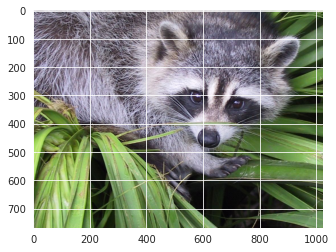

In [54]:
plt.imshow(face)

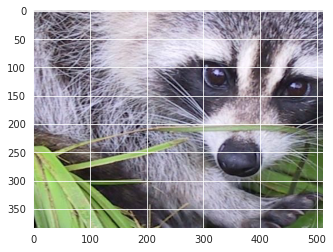

In [55]:
# Cropping

crop_face = face[int(lx/4):int(-lx/4), int(ly/4):int(-ly/4)]
plt.imshow(crop_face)
plt.show()

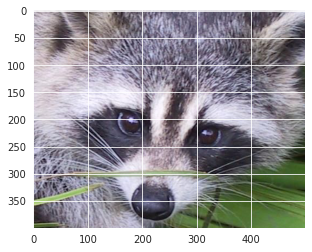

In [56]:
plt.imshow(face[100:500, 400:900])

**Rotate the image**

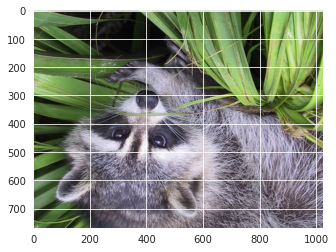

In [57]:
from scipy import misc,ndimage

face=misc.face()
rotate_face = ndimage.rotate(face,180)

plt.imshow(rotate_face)
plt.show()